# CNN MNIST (Larger model)


## Loading and preprocessing the data


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd

In [2]:
mnist = tf.keras.datasets.mnist

(X_train_, y_train), (X_test_, y_test) = mnist.load_data()
X_train_, X_test_ = (
    X_train_.astype(np.float32) / 255.0,
    X_test_.astype(np.float32) / 255.0,
)

In [3]:
print(X_train_.shape)
print(X_test_.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
# Add another dimension
X_train = X_train_[..., np.newaxis]
X_test = X_test_[..., np.newaxis]
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
# Reduce dimension size
np.random.seed(0)

REDUCE_DIM = 2000
idx = np.random.permutation(REDUCE_DIM)

X_train = X_train[idx]
y_train = y_train[idx]
X_test = X_test[idx]
y_test = y_test[idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 28, 28, 1)
(2000, 28, 28, 1)
(2000,)
(2000,)


### Constructing a CNN in Keras


After convolutional operations, `tf.keras.layers.GlobalAveragePooling` layer does is average all the values according to the last axis. This means that the resulting shape will be `(n_samples, last_axis)`. For instance, if your last convolutional layer had 64 filters, it would turn `(16, 7, 7, 64)` into `(16, 64)`.

In [6]:
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(28, 28, 1)))

model.add(
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        padding="same",
        strides=(1, 1),
        activation="relu",
    )
)

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, name="pool_1"))

model.add(tf.keras.layers.Dropout(rate=0.5))

model.add(
    tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        padding="same",
        strides=(1, 1),
        activation="relu",
    )
)

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, name="pool_2"))

model.add(tf.keras.layers.Dropout(rate=0.5))

model.add(
    tf.keras.layers.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        padding="same",
        strides=(1, 1),
        activation="relu",
    )
)

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, name="pool_3"))

model.add(
    tf.keras.layers.Conv2D(
        filters=256,
        kernel_size=(3, 3),
        padding="same",
        strides=(1, 1),
        activation="relu",
    ),
)

model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1', 
    activation='relu'))

model.add(tf.keras.layers.Dropout(
    rate=0.5))
    
model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 pool_2 (MaxPooling2D)       (None, 7, 7, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         7

In [8]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [9]:
tf_fit = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20


57/57 [==============================] - 3s 32ms/step - loss: 2.3053 - accuracy: 0.1100 - val_loss: 2.2995 - val_accuracy: 0.1000
Epoch 2/20
57/57 [==============================] - 2s 28ms/step - loss: 2.1221 - accuracy: 0.2228 - val_loss: 1.6763 - val_accuracy: 0.4250
Epoch 3/20
57/57 [==============================] - 2s 27ms/step - loss: 1.1223 - accuracy: 0.6144 - val_loss: 0.5850 - val_accuracy: 0.8300
Epoch 4/20
57/57 [==============================] - 2s 28ms/step - loss: 0.6157 - accuracy: 0.7889 - val_loss: 0.3196 - val_accuracy: 0.9100
Epoch 5/20
57/57 [==============================] - 2s 28ms/step - loss: 0.4436 - accuracy: 0.8578 - val_loss: 0.2984 - val_accuracy: 0.8900
Epoch 6/20
57/57 [==============================] - 2s 28ms/step - loss: 0.3125 - accuracy: 0.8956 - val_loss: 0.2703 - val_accuracy: 0.9050
Epoch 7/20
57/57 [==============================] - 2s 29ms/step - loss: 0.2612 - accuracy: 0.9206 - val_loss: 0.2232 - val_accuracy: 0.9400
Epoch 8/20
57/57 [======

### During training, the train accuracy will be lower than validation accuracy due to dropout.


In [10]:
# Inspect the training history
df = pd.DataFrame(tf_fit.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.305291,0.110000,2.299455,0.100
1,2.122098,0.222778,1.676301,0.425
2,1.122261,0.614444,0.584951,0.830
3,0.615709,0.788889,0.319581,0.910
4,0.443623,0.857778,0.298394,0.890


<Axes: title={'center': 'Loss'}, xlabel='Epoch', ylabel='Loss'>

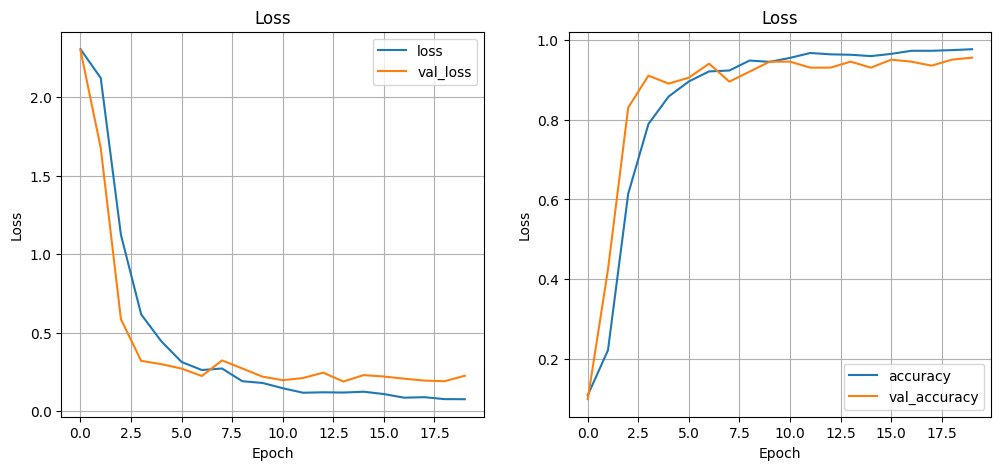

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df[["loss", "val_loss"]].plot(
    ax=axes[0], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

df[["accuracy", "val_accuracy"]].plot(
    ax=axes[1], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

In [12]:
test_results = model.evaluate(X_test, y_test)
print("\nTest Acc. {:.2f}%".format(test_results[1] * 100))

63/63 [==============================] - 0s 6ms/step - loss: 0.1764 - accuracy: 0.9490

Test Acc. 94.90%


In [13]:
# Find misclassification
y_pred_tf = model(X_test)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf, axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f"Missclassification = {loc.sum()}")

(2000,)
(2000,)
Missclassification = 102


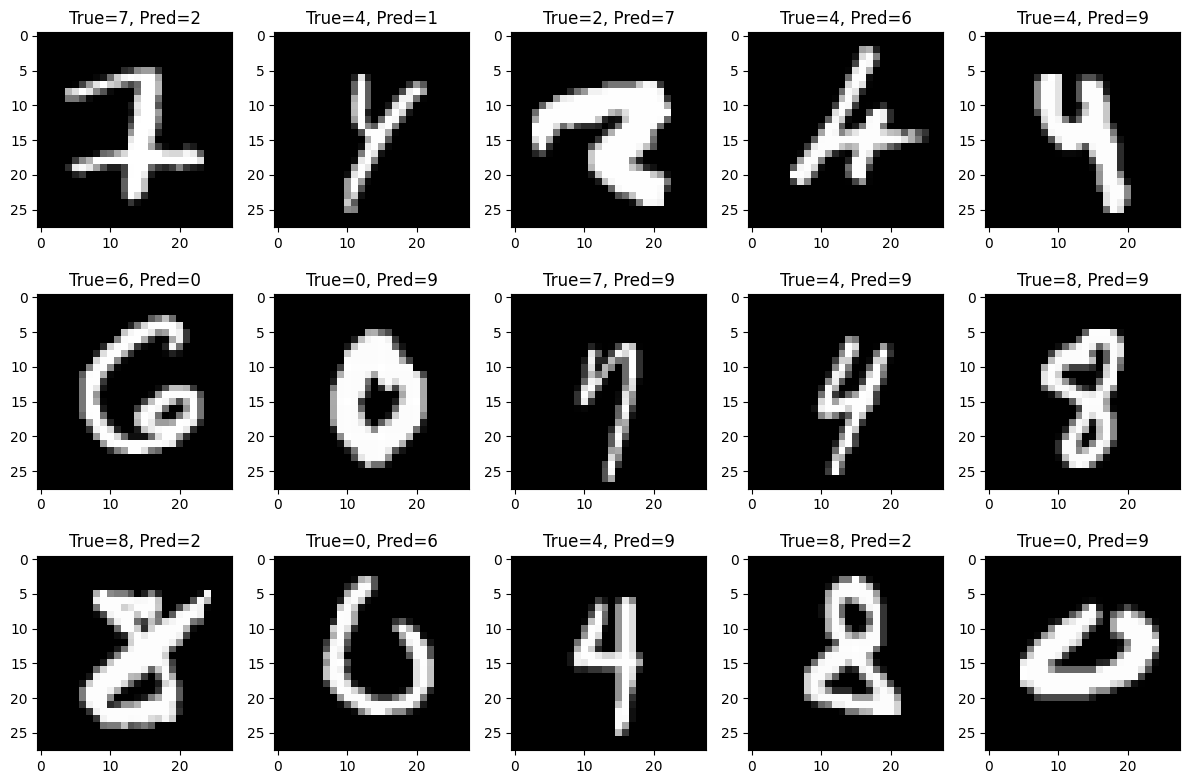

In [14]:
fig, axes2D = plt.subplots(3, 5, figsize=(12, 8))
axes = list(itertools.chain.from_iterable(axes2D))  # Flatten 2D list
X_test_miss = X_test[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap="gray")
    ax.set_title(f"True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}")
fig.tight_layout()
plt.show()